In [22]:
import numpy as np
import os
import pandas as pd
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

In [28]:
root_dir = '/neurospin/dico/jlaval/Output/V1'

regions = ['FIP_right_UKB40', 'SC-sylv_left_UKB40', 'LARGE_CINGULATE_right_UKB40', 'SOr_left_UKB40']

In [29]:
embeddings_dict = {region : [] for region in regions}

for region in regions:
    model_name = os.listdir(os.path.join(root_dir, region))[0]
    embeddings = pd.read_csv(os.path.join(root_dir, region, model_name, 'ukb40_random_embeddings/full_embeddings.csv'))
    embeddings_dict[region] = embeddings

In [30]:
## perform pairwise CCA
n_regions = len(regions)
n_comps = 32
cca = CCA(n_components=n_comps)
dims = [f'dim{k}' for k in range(1,33)]

In [31]:
corrs_matrix = np.zeros((n_regions, n_regions), dtype=object)

for i in range(len(regions)):
    for j in range(i+1, len(regions)):
        emb1 = embeddings_dict[regions[i]]
        emb2 = embeddings_dict[regions[j]]
        X1 = emb1[dims]
        X2 = emb2[dims]
        cca.fit(X1, X2)
        X1_c, X2_c = cca.transform(X1, X2)
        corrs = [np.corrcoef(X1_c[:, i], X2_c[:, i])[0, 1] for i in range(n_comps)]
        corrs_matrix[i,j]=corrs
        corrs_matrix[j,i]=corrs

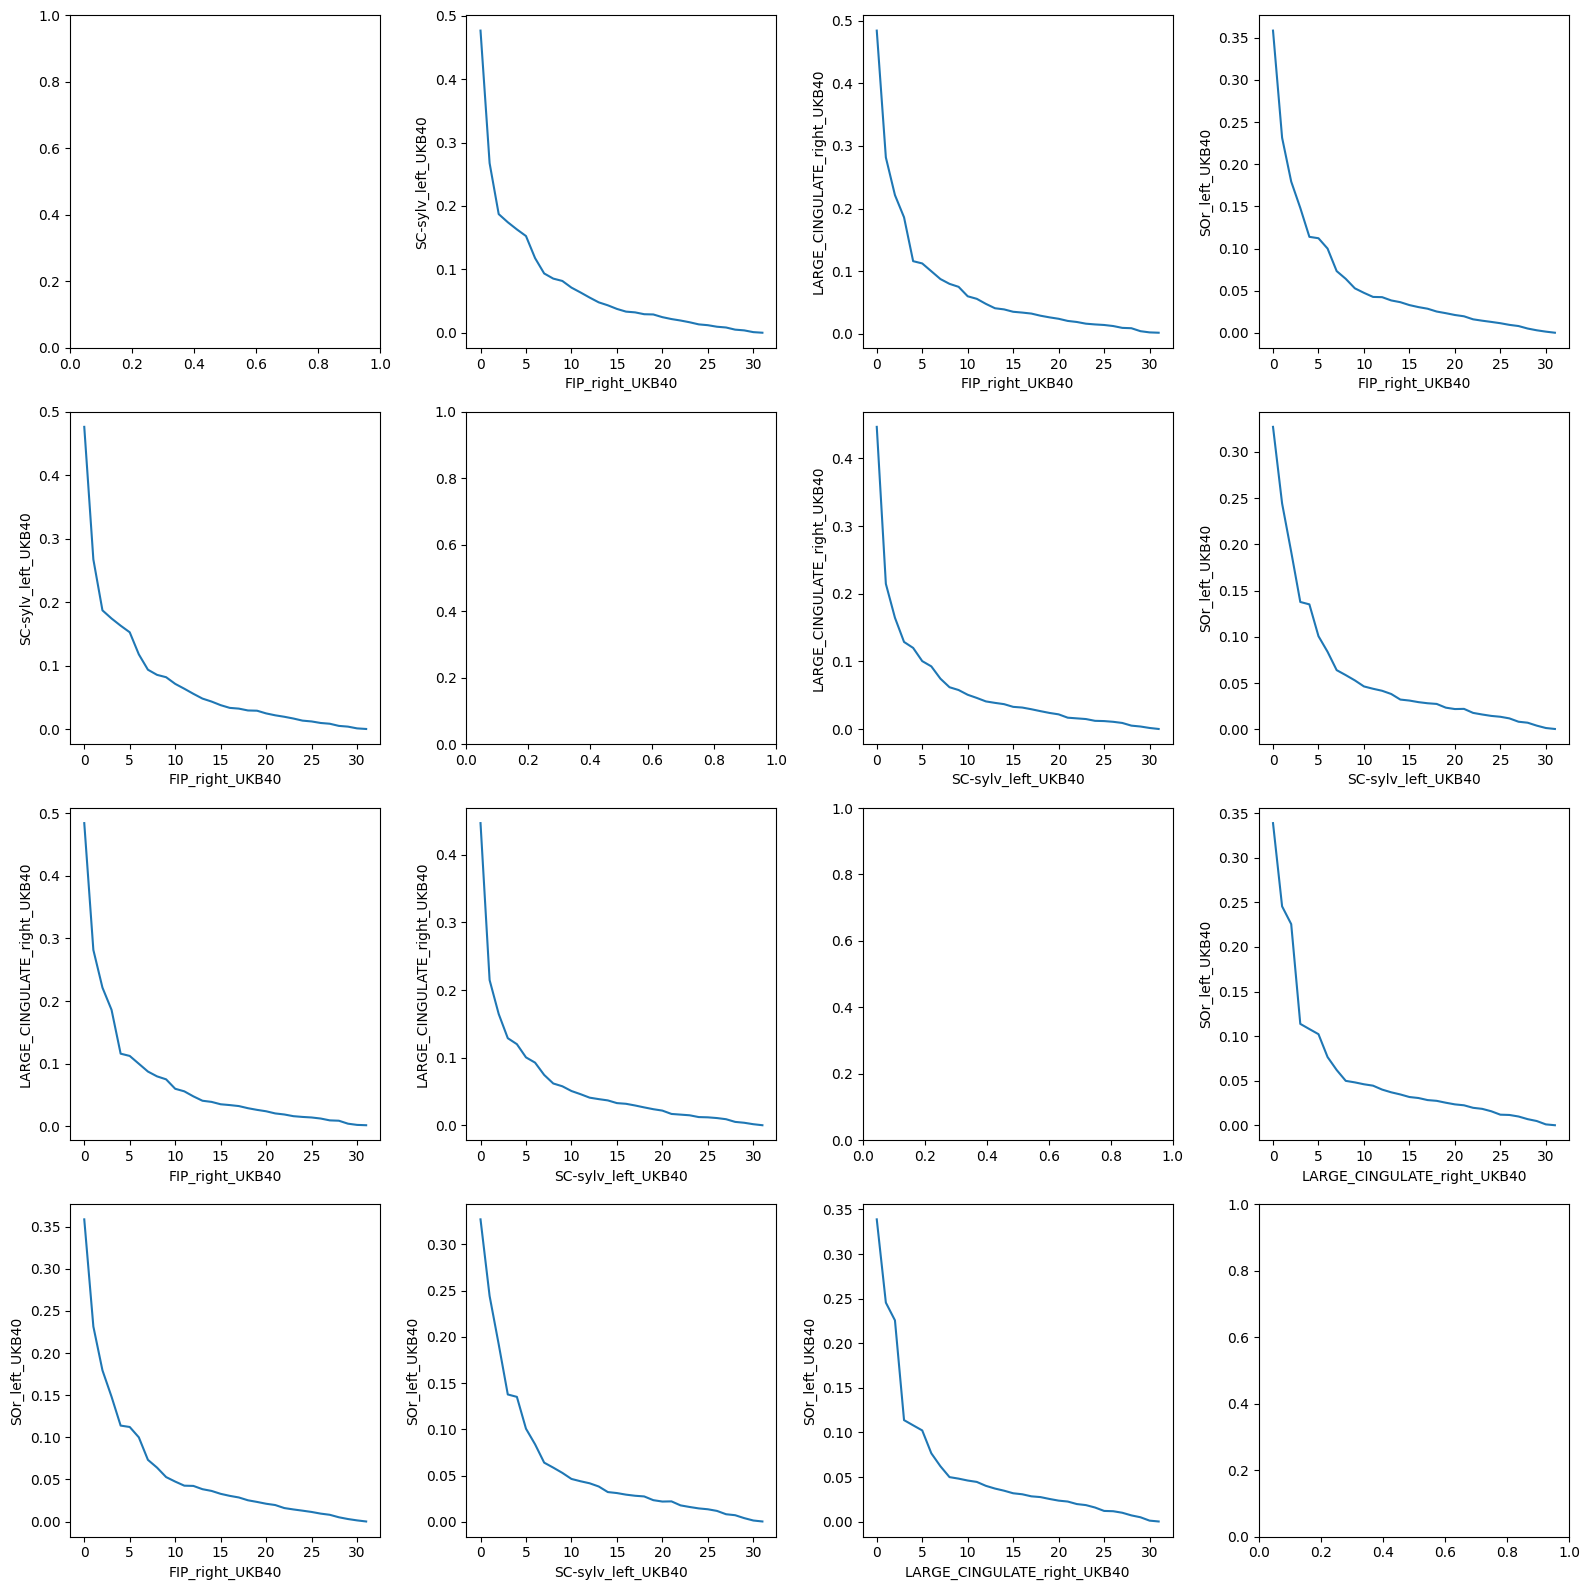

In [36]:
fig, axs = plt.subplots(n_regions, n_regions, figsize=(4*n_regions, 4*n_regions))

for i in range(len(regions)):
    for j in range(i+1, len(regions)):
        corrs = corrs_matrix[i,j]
        axs[i,j].plot(corrs)
        axs[j,i].plot(corrs)
        axs[i,j].set_xlabel(regions[i])
        axs[i,j].set_ylabel(regions[j])
        axs[j,i].set_xlabel(regions[i])
        axs[j,i].set_ylabel(regions[j])
plt.tight_layout()
plt.show()

In [19]:
cca.fit(X1, X2)
X1_c, X2_c = cca.transform(X1, X2)
corrs = [np.corrcoef(X1_c[:, i], X2_c[:, i])[0, 1] for i in range(n_comps)]

In [20]:
print(corrs)

[np.float64(0.4763036095819784), np.float64(0.2674796085412112), np.float64(0.1872148871371341), np.float64(0.17437120851304752), np.float64(0.16307066932362843), np.float64(0.1526534298948957), np.float64(0.11787584796889417), np.float64(0.09368702648760566), np.float64(0.08558569237172181), np.float64(0.08187870400931187), np.float64(0.071386329324256), np.float64(0.06373943178588505), np.float64(0.05571103479812692), np.float64(0.04817965800544737), np.float64(0.043507240079118936), np.float64(0.03783003420970136), np.float64(0.033551825880665694), np.float64(0.03238447147199929), np.float64(0.029477633165148228), np.float64(0.02909410995524985), np.float64(0.024848531064075356), np.float64(0.02184484904878056), np.float64(0.019537957243542674), np.float64(0.0167802324490117), np.float64(0.013467334381282798), np.float64(0.012176065881461624), np.float64(0.009757968017930656), np.float64(0.008561067874087174), np.float64(0.00517635403066828), np.float64(0.0040017731769876365), np.fl

In [37]:
## analyse SC-sylv left and FIP right, then visu SC sylv      
emb1 = embeddings_dict[regions[0]]
emb2 = embeddings_dict[regions[1]]
X1 = emb1[dims]
X2 = emb2[dims]
cca.fit(X1, X2)
X1_c, X2_c = cca.transform(X1, X2)
corrs = [np.corrcoef(X1_c[:, i], X2_c[:, i])[0, 1] for i in range(n_comps)]

In [52]:
## SC-sylv first directions
first_directions = X2_c[:5]

In [57]:
## perform the projection to get the phenotype
phenotypes = X2_c@first_directions.T

In [70]:
subjects = emb2['ID'].to_numpy().reshape(-1,1)
df_phenotypes = pd.DataFrame(data=np.hstack((subjects, phenotypes)), columns=['ID', '1', '2', '3', '4', '5'])

In [71]:
df_phenotypes

,ID,1,2,3,4,5
0,sub-1000021,2.240077,-1.121654,-0.245019,-0.268874,0.127591
1,sub-1000325,-1.121654,5.888436,-0.002593,1.093839,-0.326327
2,sub-1000458,-0.245019,-0.002593,2.935039,-0.017056,0.200397
3,sub-1000575,-0.268874,1.093839,-0.017056,3.171911,-0.275273
4,sub-1000606,0.127591,-0.326327,0.200397,-0.275273,1.997874
...,...,...,...,...,...,...
42428,sub-6023847,-0.001943,-0.481806,0.675373,-0.605485,0.030687
42429,sub-6024038,-0.699649,-0.075483,0.024378,-1.027219,0.195499
42430,sub-6024150,-0.077047,-0.714308,-0.047016,-1.729415,0.451529
42431,sub-6024379,-0.294853,0.228655,-1.333564,-0.505711,-0.756651


In [72]:
df_phenotypes.to_csv('/neurospin/dico/jlaval/Output/direction_analysis/phenotypes_SC_left_corr_with_FIP.csv', index=False)